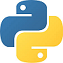
# Path Finding #

### Examples by CodeAcademy and exercise by Nick Day - September 2022 ###

## This section introduces Path Finding Algorithms such as Dijstkra's, A* Algorithm, utilising manhattan heuristic and euclidean heuristic. <font color = 'red'> For the 2023-24 run of CO536, there are no further assessed logbook exercises. </font> There is, however, an exercise at the end of this notebook if you would like to test the Path Finding Algorithms.

 - The basis of a Graph class in Python is the implementation of two classes, Graph and Vertex, which establish the essential functionality to create a variety of graphs.
 - The Vertex class allows for storage of connecting vertices with a dictionary and adjustment of their edges as well.
 - The Graph class builds upon the Vertex methods and allows addition of vertices and edges, setting the directionality of edges, and determining if a path exists between two vertices.





# Reminder on Graphs

![graph](https://miro.medium.com/max/1208/1*SSSa5VrhhjNrXDdWTBGXlA.gif)

In [ ]:
## Codeacademy 

class Vertex:
  """Key methods of Vertex class"""
  def __init__(self, value):
  def add_edge(self, vertex, weight = 0):
  def get_edges(self):

class Graph:
  """Key methods of Graph class"""
  def __init__(self, directed = False):
  def add_vertex(self, vertex):
  def add_edge(self, from_vertex, to_vertex, weight = 0):
  def find_path(self, start_vertex, end_vertex):

In [ ]:
## Codeacadeny 

def bfs(graph, start_vertex, target_value):
  path = [start_vertex]
  vertex_and_path = [start_vertex, path]
  bfs_queue = [vertex_and_path]
  visited = set()
  while bfs_queue:
    current_vertex, path = bfs_queue.pop(0)
    visited.add(current_vertex)
    for neighbor in graph[current_vertex]:
      if neighbor not in visited:
        if neighbor is target_value:
          return path + [neighbor]
        else:
          bfs_queue.append([neighbor, path + [neighbor]])

def dfs(graph, current_vertex, target_value, visited = None):
  if visited is None:
    visited = []
  visited.append(current_vertex)
  if current_vertex is target_value:
    return visited
  
  for neighbor in graph[current_vertex]:
    if neighbor not in visited:
      path = dfs(graph, neighbor, target_value, visited)
      if path:
        return path

some_important_graph = {
    'lava': set(['sharks', 'piranhas']),
    'sharks': set(['lava', 'bees', 'lasers']),
    'piranhas': set(['lava', 'crocodiles']),
    'bees': set(['sharks']),
    'lasers': set(['sharks', 'crocodiles']),
    'crocodiles': set(['piranhas', 'lasers'])
  }

print(bfs(some_important_graph, 'lava', 'lasers'))
print(dfs(some_important_graph, 'lava', 'lasers'))

# Dijsktra's Algorithm

The algorithm was invented by Edsgar W. Dijkstra (1930-2002) in 1956. 

![Edsgar](http://www.computinghistory.org.uk/userdata/images/large/34/84/product-73484.jpg)

It was originally conceived to find the shortest path covering all vertices, but can also be customised to find the shortest path between two specific vertices. It works with assigning labels to each vertex in the graph, as they are visited. The label contains the sum of the weighting to travel to that vertex. At the end, the shortest path is revealed by the smallest label.

![dijalgo1](https://upload.wikimedia.org/wikipedia/commons/5/57/Dijkstra_Animation.gif)

![dijalgo2](https://2497063786-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LdGcqx-Ay6h4-DM_J08%2F-LdQqBd3uKWBVNik1EzU%2F-LdQqDsb98yf6tUa_Yif%2Fdijkstra.gif?alt=media&token=a2c261f8-3e0a-46ab-a6cc-abe9f6b2b934)

In [ ]:

graph = {
  'A': [('B', 10), ('C', 3)],
  'B': [('C', 3), ('D', 2)],
  'C': [('D', 2)],
  'D': [('E', 10)],
  'E': [('B', 15)],
}


for vertex in graph:
  print("\n\nVertex {0} connects to: ".format(vertex))
  for edge in graph[vertex]:
    print("vertex {0} with a weight of {1}".format(edge[0], edge[1]))

# Implementation



Wrap start and goal in Nodes
insert start node into open list 
Loop while open not empty
</t>set current to lowest node in open
remove current from open
store current’s adjacent vertices in adjacent linked list
loop while adjacent not empty
set adj to lowest weighted in adjacent list
wrap adj in Node
set distance to current’s g value + DistanceBetween current and adj if adj node’s g is zero or distance < adj node’s g
set adj node’s g to distance
set adj node’s parent to current end if
if adj is goal
return ReconstructPlan(adj’s node)
end if
insert adj’s node into open delete adj from adjacent list
end loop end loop
return 0

In [ ]:
function Dijkstra(Graph, source):
       dist[source]  := 0                     // Distance from source to source is set to 0
       for each vertex v in Graph:            // Initializations
           if v ≠ source
               dist[v]  := infinity           // Unknown distance function from source to each node set to infinity
           add v to Q                         // All nodes initially in Q

      while Q is not empty:                  // The main loop
          v := vertex in Q with min dist[v]  // In the first run-through, this vertex is the source node
          remove v from Q 

          for each neighbor u of v:           // where neighbor u has not yet been removed from Q.
              alt := dist[v] + length(v, u)
              if alt < dist[u]:               // A shorter path to u has been found
                  dist[u]  := alt            // Update distance of u 

      return dist[]
  end function

# Heapq

![heapq](https://i.imgur.com/nJOypZz.gif)

In [ ]:
#Write Import Statement here
import heapq


heap = [(0, 'A')]
heapq.heappush(heap, (1, 'B'))
heapq.heappush(heap, (-5, 'D'))
heapq.heappush(heap, (4, 'E'))
heapq.heappush(heap, (2, 'C'))

print("The smallest values in the heap in ascending order are:\n")
while heap:
  print(heapq.heappop(heap))

# Dijkstra's Algorithm



In [2]:
from heapq import heappop, heappush
from math import inf

graph = {
        'A': [('B', 10), ('C', 3)],
        'C': [('D', 2)],
        'D': [('E', 10)],
        'E': [],
        'B': [('C', 3), ('D', 2)]
    }


def dijkstras(graph, start):
  distances = {}
  for vertex in graph:
    distances[vertex] = inf
  distances[start] = 0
  vertices_to_explore = [(0, start)]
  
  while vertices_to_explore:
    current_distance, current_vertex = heappop(vertices_to_explore)
    # Finish dijkstras() below:
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight
      if new_distance < distances[neighbor]:
        distances[neighbor] = new_distance
        heappush(vertices_to_explore, (new_distance, neighbor))
        
  return distances
        
distances_from_a = dijkstras(graph, 'A')
print("\n\nShortest Distances: {0}".format(distances_from_a))




Shortest Distances: {'A': 0, 'C': 3, 'D': 5, 'E': 15, 'B': 10}


In [1]:
from math import inf
inf

inf

In [3]:
from heapq import heappop, heappush
from math import inf

graph = {
        'A': [('B', 10), ('C', 3)],
        'C': [('D', 2)],
        'D': [('E', 10)],
        'E': [('A', 7)],
        'B': [('C', 3), ('D', 2)]
    }


def dijkstras(graph, start):
  distances = {}
  
  for vertex in graph:
    distances[vertex] = inf
    
  distances[start] = 0
  vertices_to_explore = [(0, start)]
  
  while vertices_to_explore:
    current_distance, current_vertex = heappop(vertices_to_explore)
    
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight
      
      if new_distance < distances[neighbor]:
        distances[neighbor] = new_distance
        heappush(vertices_to_explore, (new_distance, neighbor))
        
  return distances
        
distances_from_d = dijkstras(graph, 'D')
print("\n\nShortest Distances: {0}".format(distances_from_d))




Shortest Distances: {'A': 17, 'C': 20, 'D': 0, 'E': 10, 'B': 27}


# A star 

This algorithm was first published in 1968 by colleagues at the Stanford Research Institute.

It can be seen as an extension of Dijkstra's algorithm. A* achieves better performance by using heuristics to guide its search.

Compared to Dijkstra's algorithm, the A* algorithm only finds the shortest path from a specified source to a specified goal, and not the shortest-path tree from a specified source to all possible goals. This is a necessary trade-off for using a specific-goal-directed heuristic. For Dijkstra's algorithm, since the entire shortest-path tree is generated, every node is a goal, and there can be no specific-goal-directed heuristic.

![astar](https://camo.githubusercontent.com/4ee5aed430b01073409c91036329200f10a71c97fd643acbfcff047d821e7741/687474703a2f2f672e7265636f726469742e636f2f51784d44503679577a422e676966)

wrap start and goal in Nodes insert start node into open list Loop while open not empty
set current to lowest node in open remove current from open
store current’s adjacent vertices in adjacent priority list loop while adjacent not empty
set adj to the remove vertex in adjacent priority list wrap adj in Node
set adjNode’s parent to current
if adjNode is goal
return ReconstructPlan(adj’s node)
end if
adjNode’s g = current’s g + DistanceBwteenvertices current and adj adjNode’s h = GetHeuristic between adj and goal
adjNode’s f = g + h
set foundInOpen = find adj’s node in open list
if foundInOpen <> 0 and foundInOpen’s f < adj Node’s f
skip to next adjacent iteration
end if
set foundInClosed = find adj’s node in closed lis
if foundInClose <> 0 and foundInClosed’s f < adj Node’s f
skip to next adjacent iteration
end if
insert adj node into open end loop
insert current into closed end loop
return 0

In [4]:
# A* #
from math import inf
from heapq import heappop, heappush

def a_star(graph, start, target):
  paths_and_distances = {}
  for vertex in graph:
    paths_and_distances[vertex] = [inf, [start.name]]
  
  paths_and_distances[start] = 0
  vertices_to_explore = [(0, start)]

  while vertices_to_explore:
    current_distance, current_vertex = heappop(vertices_to_explore)
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight
      if new_distance < paths_and_distances[neighbor]:
        paths_and_distances[neighbor] = new_distance
        heappush(vertices_to_explore, (new_distance, neighbor))
  
  return paths_and_distances

# A graph and vertices for us to play around with:
class graph_vertex:
  def __init__(self, name, x, y):
    self.name = name
    self.position = (x, y)

delhi = graph_vertex("New Delhi", 28.6448, 77.216721)
jaipur = graph_vertex("Jaipur", 26.92207, 75.778885)
varanasi = graph_vertex("Varanasi", 25.321684, 82.987289)
mumbai = graph_vertex("Mumbai", 19.07283, 72.88261)
chennai = graph_vertex("Chennai", 13.067439, 80.237617)
hyderabad = graph_vertex("Hyderabad", 17.387140, 78.491684)
kolkata = graph_vertex("Kolkata", 22.572645, 88.363892)
bengaluru = graph_vertex("Bengaluru", 12.972442, 77.580643)

cities_graph = {
  delhi: set([(jaipur, 2.243918), (varanasi, 6.65902), (mumbai, 10.507479), (chennai, 15.867576), (hyderabad, 11.329626), (kolkata, 12.693718), (bengaluru, 15.676582)]),
  jaipur: set([(mumbai, 8.366539), (delhi, 2.243918)]),
  varanasi: set([(delhi, 6.65902), (mumbai, 11.88077)]),
  mumbai: set([(delhi, 10.507479), (jaipur, 8.366539), (varanasi, 11.88077), (hyderabad, 5.856898), (kolkata, 15.87195), (bengaluru, 7.699756)]),
  chennai: set([(delhi, 15.867576), (kolkata, 12.50541), (hyderabad, 4.659195), (bengaluru, 2.658671)]),
  hyderabad: set([(delhi, 11.329626), (mumbai, 5.856898), (chennai, 4.659195), (bengaluru, 4.507721), (kolkata, 11.151231)]),
  kolkata: set([(delhi, 12.693718), (mumbai, 15.87195), (chennai, 12.50541), (hyderabad, 11.151231), (bengaluru, 14.437532)]),
  bengaluru: set([(delhi, 15.676582), (mumbai, 7.699756), (chennai, 2.658671), (hyderabad, 4.507721), (kolkata, 14.437532)])
}
a_star(cities_graph, delhi, varanasi)


TypeError: '<' not supported between instances of 'float' and 'list'

# Add Heuristic
So far, what you’ve created is a modified Dijkstra’s algorithm that has a target and returns the path to that target.

To make this algorithm truly a star A*, you’ll need to add a heuristic that estimates the distance from a given vertex to the target.

By doing this, the algorithm is able to efficiently and accurately predict whether or not it is heading in the best possible direction.

In [5]:
from math import inf
from heapq import heappop, heappush
from manhattan_graph import manhattan_graph, thirty_sixth_and_sixth, grand_central_station

def modified_dijkstras(graph, start, target):
  print("Starting Dijkstra's algorithm!")
  count = 0
  paths_and_distances = {}
  for vertex in graph:
    paths_and_distances[vertex] = [inf, [start.name]]
  
  paths_and_distances[start][0] = 0
  vertices_to_explore = [(0, start)]

  while vertices_to_explore:
    current_distance, current_vertex = heappop(vertices_to_explore)
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight
      new_path = paths_and_distances[current_vertex][1] + [neighbor.name]
      if new_distance < paths_and_distances[neighbor][0]:
        paths_and_distances[neighbor][0] = new_distance
        paths_and_distances[neighbor][1] = new_path
        heappush(vertices_to_explore, (new_distance, neighbor))
        count += 1
        print("\nAt " + vertices_to_explore[0][1].name)
  print("Found a path in {0} steps: ".format(count), paths_and_distances[target][1])
  return paths_and_distances[target][1]

def heuristic(start, target):
  x_distance = abs(start.position[0] - target.position[0])
  y_distance = abs(start.position[1] - target.position[1])
  return x_distance + y_distance

def a_star(graph, start, target):
  print("Starting A* algorithm!")
  count = 0
  paths_and_distances = {}
  for vertex in graph:
    paths_and_distances[vertex] = [inf, [start.name]]
  
  paths_and_distances[start][0] = 0
  vertices_to_explore = [(0, start)]
  while vertices_to_explore and paths_and_distances[target][0] == inf:
    current_distance, current_vertex = heappop(vertices_to_explore)
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight + heuristic(neighbor, target)
      new_path = paths_and_distances[current_vertex][1] + [neighbor.name]
      
      if new_distance < paths_and_distances[neighbor][0]:
        paths_and_distances[neighbor][0] = new_distance
        paths_and_distances[neighbor][1] = new_path
        heappush(vertices_to_explore, (new_distance, neighbor))
        count += 1
        print("\nAt " + vertices_to_explore[0][1].name)
        
  print("Found a path in {0} steps: ".format(count), paths_and_distances[target][1])
  
  return paths_and_distances[target][1]


modified_dijkstras(manhattan_graph, thirty_sixth_and_sixth, grand_central_station)

a_star(manhattan_graph, thirty_sixth_and_sixth, grand_central_station)

ModuleNotFoundError: No module named 'manhattan_graph'

# Manhattan Heuristic

There are several kinds of heuristics out there that you can use to estimate distance, but we’ll start with the Manhattan heuristic. This heuristic is only considered admissible — meaning that it never overestimates the distance in reaching the target — in a grid system in which the search can only move up, down, left, or right.

To get the heuristic estimate, we need to:

- Measure the distance between the two vertices’ x positional values and between their y positional values.
- Return the sum of the x distance and y distance together.

![manhattan](https://www.101computing.net/wp/wp-content/uploads/taxicab-manhattan-grid-layout-paths.gif) 

In [ ]:
from math import inf
from heapq import heappop, heappush
from manhattan_graph import manhattan_graph, penn_station, grand_central_station

# Manhattan Heuristic
def heuristic(start, target):
  x_distance = abs(start.position[0] - target.position[0])
  y_distance = abs(start.position[1] - target.position[1])
  return x_distance + y_distance

def a_star(graph, start, target):
  print("Starting A* algorithm!")
  count = 0
  paths_and_distances = {}
  for vertex in graph:
    paths_and_distances[vertex] = [inf, [start.name]]
  
  paths_and_distances[start][0] = 0
  vertices_to_explore = [(0, start)]
  while vertices_to_explore and paths_and_distances[target][0] == inf:
    current_distance, current_vertex = heappop(vertices_to_explore)
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight + heuristic(neighbor, target)
      new_path = paths_and_distances[current_vertex][1] + [neighbor.name]
      
      if new_distance < paths_and_distances[neighbor][0]:
        paths_and_distances[neighbor][0] = new_distance
        paths_and_distances[neighbor][1] = new_path
        heappush(vertices_to_explore, (new_distance, neighbor))
        count += 1
        print("\nAt " + vertices_to_explore[0][1].name)
        
  print("Found a path from {0} to {1} in {2} steps: ".format(start.name, target.name, count), paths_and_distances[target][1])
  
  return paths_and_distances[target][1]

# Call a_star() on manhattan_graph to find the best route
# from penn_station to grand_central_station:
a_star(manhattan_graph, penn_station, grand_central_station)

# Euclidean Heuristic

Not all vertices are on a grid and sometimes the shortest distance is closer to a direct diagonal line between two points. For these situations, a Manhattan heuristic would overestimate the total distance, making it inadmissible; the Euclidean heuristic would be a better fit.

The Euclidean heuristic works off of the Pythagorean theorem: 
​	 
When you think about it, what we are finding is essentially a hypotenuse of a right triangle; the other two sides would be the x-distance and the y-distance.

![euclidean_vs_manhattan](https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/07/01130416/june-30-hierarchical-clustering-infograph-for-blog-4.png)


In [ ]:
from math import inf, sqrt
from heapq import heappop, heappush
from euclidean_graph import euclidean_graph, bengaluru, jaipur

# Euclidean Heuristic
def heuristic(start, target):
  x_distance = abs(start.position[0] - target.position[0])
  y_distance = abs(start.position[1] - target.position[1])
  return sqrt(x_distance * x_distance + y_distance * y_distance)

def a_star(graph, start, target):
  print("Starting A* algorithm!")
  count = 0
  paths_and_distances = {}
  for vertex in graph:
    paths_and_distances[vertex] = [inf, [start.name]]
  
  paths_and_distances[start][0] = 0
  vertices_to_explore = [(0, start)]
  while vertices_to_explore and paths_and_distances[target][0] == inf:
    current_distance, current_vertex = heappop(vertices_to_explore)
    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight + heuristic(neighbor, target)
      new_path = paths_and_distances[current_vertex][1] + [neighbor.name]
      
      if new_distance < paths_and_distances[neighbor][0]:
        paths_and_distances[neighbor][0] = new_distance
        paths_and_distances[neighbor][1] = new_path
        heappush(vertices_to_explore, (new_distance, neighbor))
        count += 1
        print("\nAt " + vertices_to_explore[0][1].name)
        
  print("Found a path from {0} to {1} in {2} steps: ".format(start.name, target.name, count), paths_and_distances[target][1])
  
  return paths_and_distances[target][1]

# Call a_star() on euclidean_graph to find the best route
# from jaipur to bengaluru:
a_star(euclidean_graph, jaipur, bengaluru)

## <font color="red">Exercise</font> ##

<b>For the 2023-24 run of CO536, you are NOT required to complete this exercise for CW1 - this subject may, however, be useful for CW2 (your report).</b>

Insert a 'code' cell below. In this do the following:

- 1 - First create an instance of a Graph. If you completed last week's exercises, then you could utilise this graph. 
- 2 - Test that you can run Dijkstra's algorithm on a graph. 
- 3 - Now run A* (A Star) on a graph with the <b> manhattan </b> heuristic.
- 4 - Now run A* (A Star) on a graph with the <b> euclidean </b> heuristic.

# References & Learning Resources#

 - W3Schools - there are many online resources for Python but the Python tutorial at https://www.w3schools.com/python/ is thorough, progressive, interactive and free. If you complete the main tutorial (skip the bits on installing Python as we will be using Ancaconda/Jupyter) the later sections on **"File Handling"**, **"NumPy"** and **"Machine Learning"** are also relevant. The **"Exercises"** and **"Quiz"** sections are also worthwhile activities for consolidating knowledge.
 - **Phillips, D. (2015). Python 3 object-oriented programming. Packt Publishing Ltd.** Although a 3rd edition has been released the 2nd edition is still pretty much up-to-date  and seems to be widely available in PDF format. As an added bonus this covers Design Patterns in some detail.
 - **https://www.learnpython.org/** is another comprehensive and intercative resource
 - **https://docs.python.org/3.7/tutorial/** is Python's own text-based tutorial. Despite the seemingly daunting number of sub-sections, it can be consumed in a fairly short time and manages to be both concise and comprehensive.
 - **Think Python 2e** is an excellent in-depth and free version of the O'Reilly hardcopy by Allen B. Downey and is available here ... https://greenteapress.com/wp/think-python-2e/
 - https://www.sololearn.com/ - great for mobile learning on the go ... free! Recommended by JJ
 - I have also adapted examples from *Learn Python In A Day: The Ultimate Crash Course To Learning The Basics Of Python In No Time* by *Acodemy* but this is out of print and is only mentioned for completeness.